# Articulos
https://towardsdatascience.com/smote-fdce2f605729#:~:text=SMOTE%20is%20an%20algorithm%20that%20performs%20data%20augmentation,or%20as%20a%20specific%20algorithm%20for%20data%20augmentation.

https://towardsdatascience.com/beginner-guide-to-build-compare-and-evaluate-machine-learning-models-in-under-10-minutes-19a6781830de

In [1]:
# carga incial de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold


In [2]:
# Import the data
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')
data.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


<AxesSubplot:xlabel='buy'>

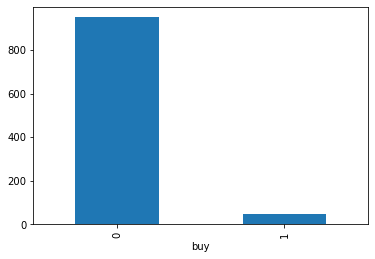

In [3]:
# Showing the class imbalance between buyers and non-buyers
data.pivot_table(index='buy', aggfunc='size').plot(kind='bar')

In [4]:

# Create a stratified train/test split. 
# Test set will be 30% of the data.
# Class distribution will be equal for train test and original data

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, stratify=data.buy)

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='buy'>

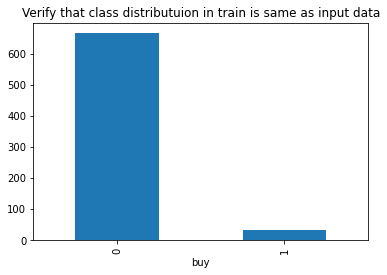

In [6]:
# Comprobacion de que la muestra tiene clases no balanceadas
train.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


<AxesSubplot:title={'center':'Verify that class distributuion in test is same as input data'}, xlabel='buy'>

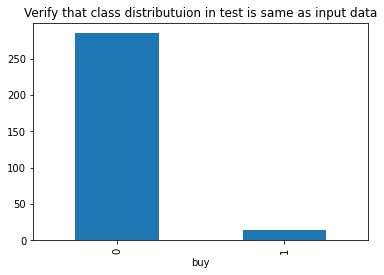

In [7]:
# Comprobacion de que el test tiene clases no balanceadas
test.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')


In [8]:
# Construccion del modelo de regresion logistica

from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(train[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']], train['buy'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']])


In [9]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['buy'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  283 
False positives:  2 
False negatives:  8 
True Positives:  7


In [10]:
# informe de clasificacion
from sklearn.metrics import classification_report
print(classification_report(test['buy'], preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.78      0.47      0.58        15

    accuracy                           0.97       300
   macro avg       0.88      0.73      0.78       300
weighted avg       0.96      0.97      0.96       300



In [11]:
# Aplicacion SMOTE.- Paso 1
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']], train['buy'])


<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='buy'>

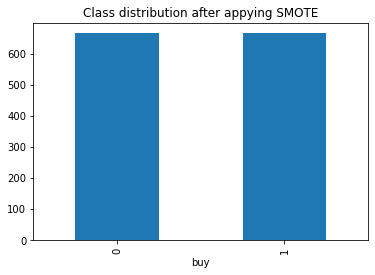

In [12]:
# Comprobacion de aplicar SMOTE
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='buy')


In [13]:
# SMOTE.- Paso 2.- Nuevo modelo
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(test[['time_on_page', 'pages_viewed',	'interest_ski',	'interest_climb']])


In [14]:
#SMOTE.- Paso 3.- Nuevas metricas
tn, fp, fn, tp = confusion_matrix(test['buy'], preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)


True negatives:  263 
False positives:  22 
False negatives:  2 
True positives:  13


In [15]:

print(classification_report(test['buy'], preds2))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       285
           1       0.37      0.87      0.52        15

    accuracy                           0.92       300
   macro avg       0.68      0.89      0.74       300
weighted avg       0.96      0.92      0.93       300

